In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ipl_2025_auction_players_1.csv')

# Display the first few rows
print(df.head())


            Players Team  Type   Sold Age
0       Virat Kohli  RCB   BAT     21  36
1     Rajat Patidar  RCB   BAT     11  24
2        Yash Dayal  RCB  BOWL      5  34
3    Jasprit Bumrah   MI  BOWL     18  31
4  Suryakumar Yadav   MI   BAT  16.35  27


In [ ]:
# Check for missing values
print(df.isnull().sum())


# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Handle missing values if needed
df.dropna(subset=['Sold'], inplace=True)

# Ensure the 'Price' column is numeric
df['Sold'] = pd.to_numeric(df['Sold'], errors='coerce')

# Verify dataset info
print(df.info())


Players     0
Team        0
Type        0
Sold        0
Age        48
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Players  623 non-null    object 
 1   Team     623 non-null    object 
 2   Type     623 non-null    object 
 3   Sold     227 non-null    float64
 4   Age      575 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.5+ KB
None


In [36]:
# Assuming your dataset is loaded into the variable 'df'
# Display summary statistics for the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             Sold         Age
count  227.000000  567.000000
mean     5.207489   27.373898
std      6.028455    4.845079
min      0.300000   14.000000
25%      0.750000   24.000000
50%      2.400000   27.000000
75%      8.875000   31.000000
max     27.000000   42.000000


In [ ]:
# Top 10 Most Expensive Players
top_10_expensive = df.nlargest(10, 'Sold')

# Display the result
print(top_10_expensive[['Players', 'Team', 'Type', 'Sold','Age']])


             Players  Team  Type   Sold   Age
48      Rishabh Pant   LSG   BAT  27.00  27.0
47      Shreyas Iyer  PBKS   BAT  26.75  30.0
66    Venkatesh Iyer   KKR    AR  23.75  30.0
8   Heinrich Klaasen   SRH   BAT  23.00  33.0
0        Virat Kohli   RCB   BAT  21.00  36.0
39   Nicholas Pooran   LSG   BAT  21.00  29.0
3     Jasprit Bumrah    MI  BOWL  18.00  31.0
9        Pat Cummins   SRH    AR  18.00  31.0
13   Ruturaj Gaikwad   CSK   BAT  18.00  27.0
14   Ravindra Jadeja   CSK    AR  18.00  36.0


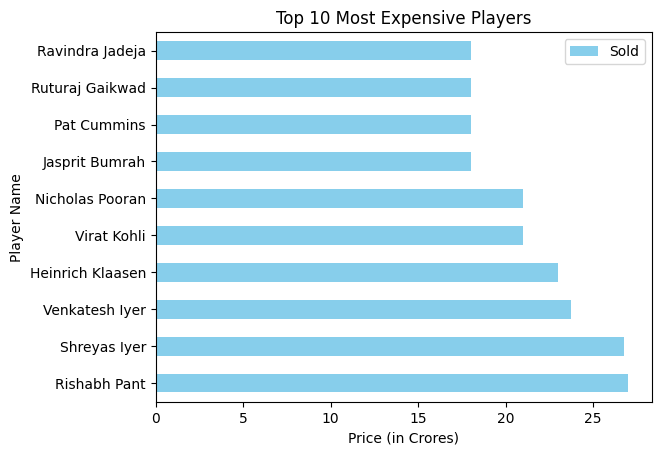

In [ ]:
# Top 10 Most Expensive Players Bar Plot
top_10_expensive.plot(
    kind='barh',
    x='Players',
    y='Sold',
    color='skyblue',
    title='Top 10 Most Expensive Players'
)

plt.xlabel('Price (in Crores)')
plt.ylabel('Player Name')
plt.show()


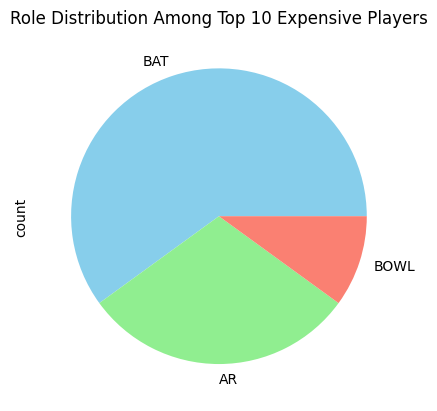

In [ ]:
# Role Distribution Pie Chart
top_10_expensive['Type'].value_counts().plot(
    kind='pie',
    colors=['skyblue', 'lightgreen', 'salmon', 'gold'],
    title='Role Distribution Among Top 10 Expensive Players'
)
plt.show()


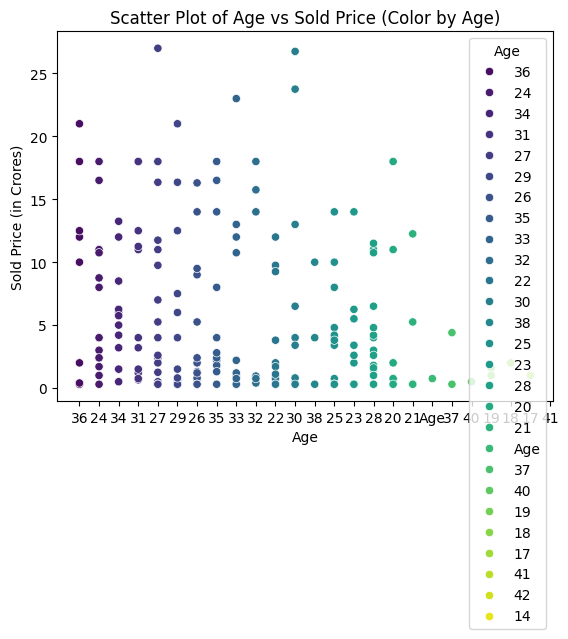

In [ ]:
# Scatter Plot for Age vs Sold Price, color by Age
sns.scatterplot(data=df, x='Age', y='Sold', hue='Age', palette='viridis')
plt.title('Scatter Plot of Age vs Sold Price (Color by Age)')
plt.xlabel('Age')
plt.ylabel('Sold Price (in Crores)')
plt.legend(title='Age')
plt.show()




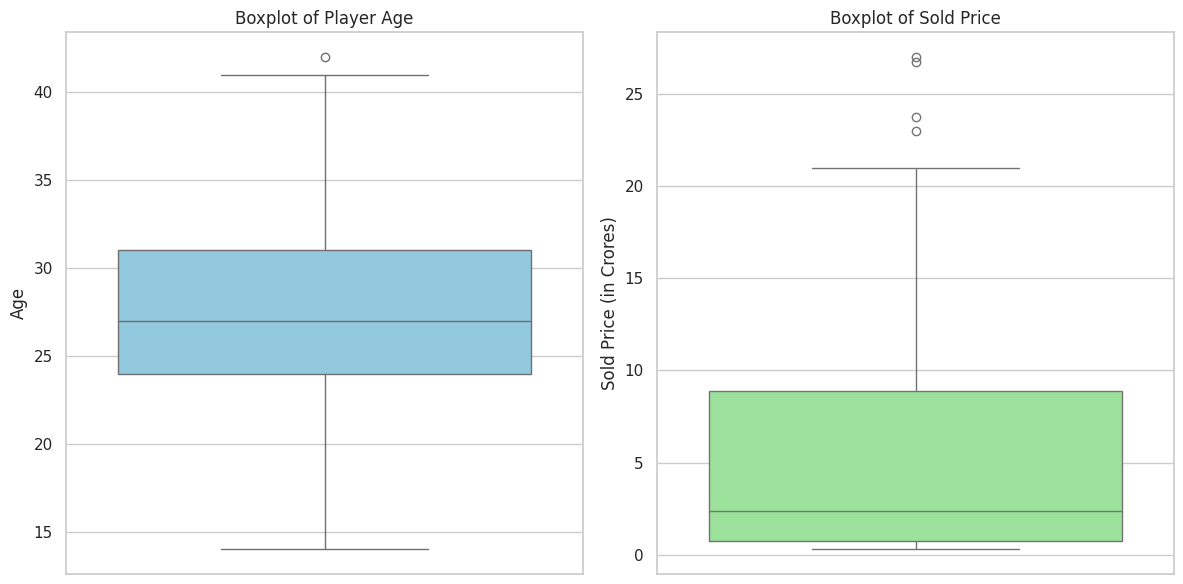

In [11]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Age
sns.boxplot(data=df, y='Age', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Player Age')
axes[0].set_ylabel('Age')

# Boxplot for Sold Price
sns.boxplot(data=df, y='Sold', ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Sold Price')
axes[1].set_ylabel('Sold Price (in Crores)')

# Display the plots
plt.tight_layout()
plt.show()


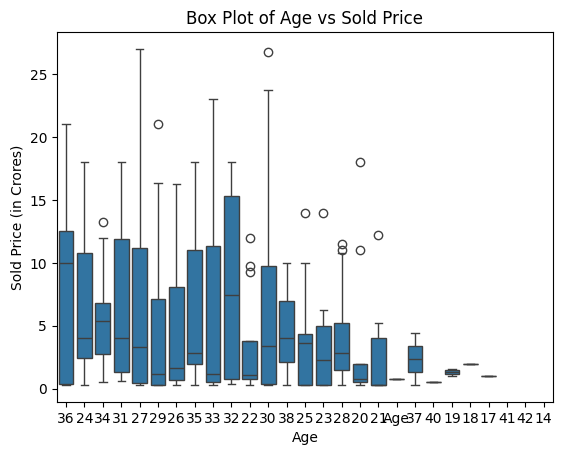

In [ ]:
# Box Plot for Age vs Sold Price (Price)
sns.boxplot(data=df, x='Age', y='Sold')
plt.title('Box Plot of Age vs Sold Price')
plt.xlabel('Age')
plt.ylabel('Sold Price (in Crores)')
plt.show()



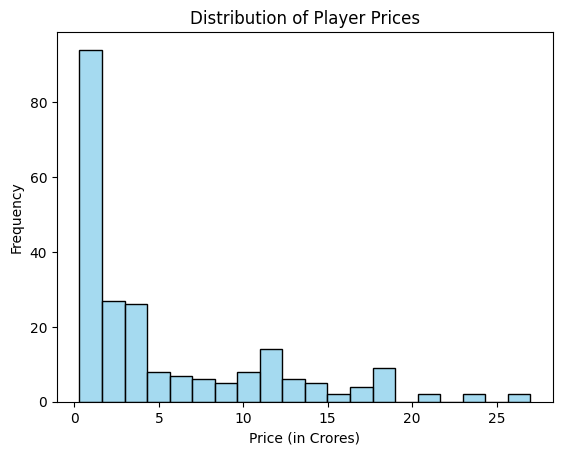

In [ ]:
# Histogram for Player Prices
sns.histplot(df['Sold'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Player Prices')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')
plt.show()


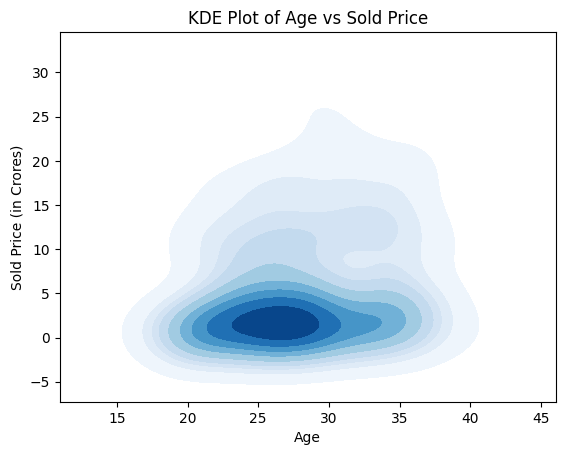

In [ ]:
# KDE Plot for Age vs Sold Price (Price)
sns.kdeplot(data=df, x='Age', y='Sold', cmap='Blues', fill=True)
plt.title('KDE Plot of Age vs Sold Price')
plt.xlabel('Age')
plt.ylabel('Sold Price (in Crores)')
plt.show()



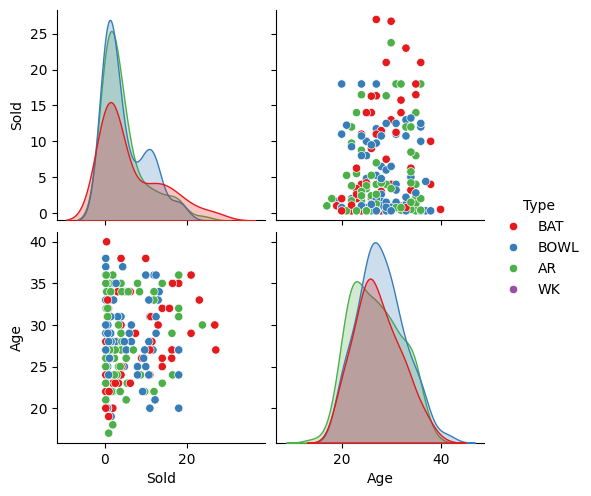

In [ ]:
# Pair Plot for your dataset, color points by 'Role' (or another categorical column)
sns.pairplot(df, hue='Type', palette='Set1')

# Show the plot
plt.show()


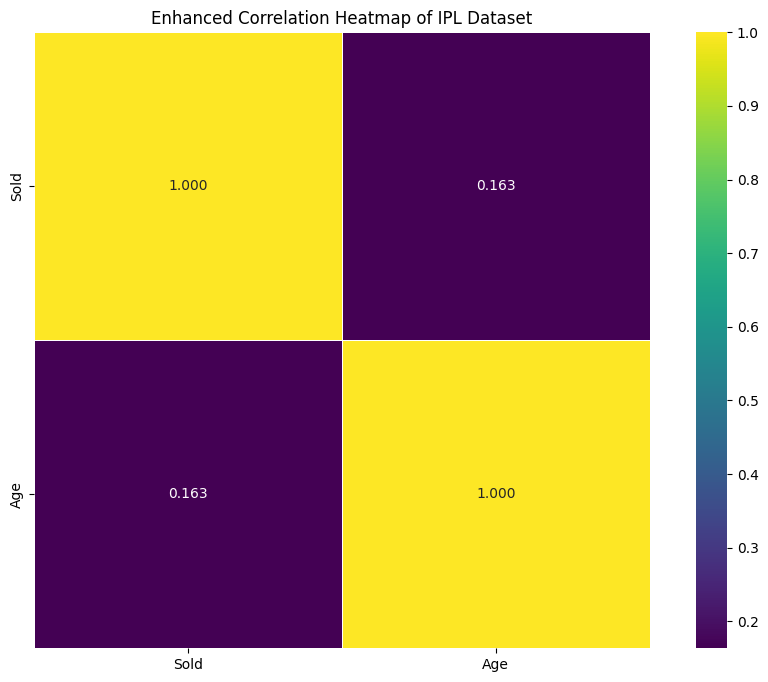

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Create the heatmap with enhancements
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5, square=True)

# Title for the plot
plt.title("Enhanced Correlation Heatmap of IPL Dataset")

# Show the plot
plt.show()



<ipython-input-48-0e1585206bbb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Type', y='Sold', jitter=True, palette='pastel')


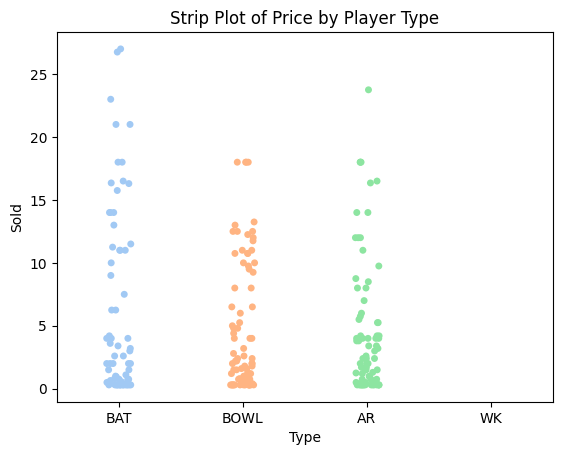

In [ ]:
# Strip Plot of Age vs Sold Price (adjust 'x' and 'y' for other columns)
sns.stripplot(data=df, x='Type', y='Sold', jitter=True, palette='pastel')

# Adding title to the plot
plt.title("Strip Plot of Price by Player Type")

# Show the plot
plt.show()


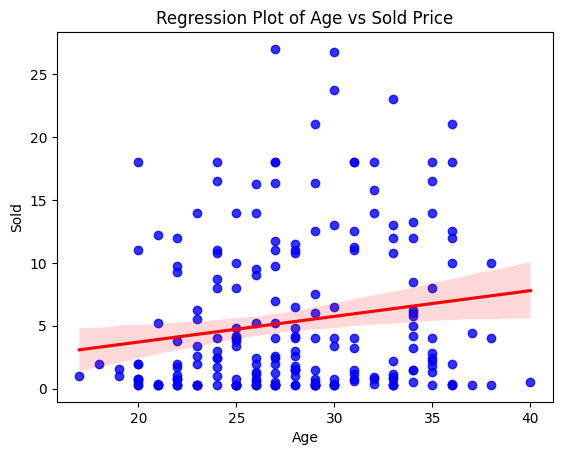

In [ ]:
# Regression plot for Age vs Sold Price (adjust 'x' and 'y' for other columns)
sns.regplot(data=df, x='Age', y='Sold', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Adding title to the plot
plt.title("Regression Plot of Age vs Sold Price")

# Show the plot
plt.show()


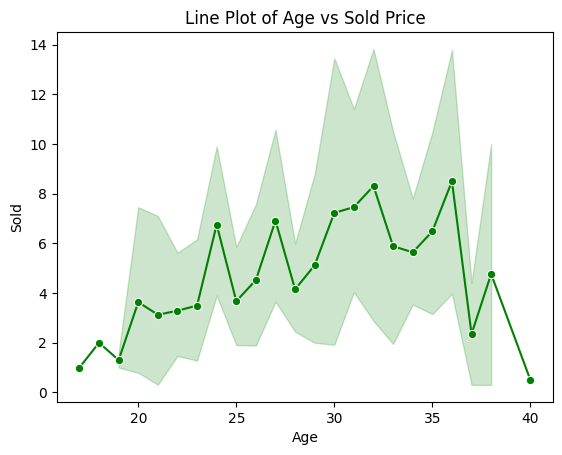

In [ ]:
# Line plot for Age vs Sold Price (adjust 'x' and 'y' for other columns)
sns.lineplot(data=df, x='Age', y='Sold', marker='o', color='green')

# Adding title to the plot
plt.title("Line Plot of Age vs Sold Price")

# Show the plot
plt.show()


<ipython-input-51-85447d2f20a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Type', y='Sold', palette='muted')


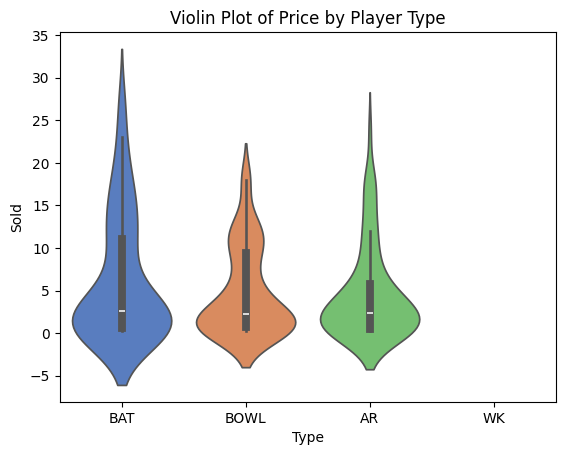

In [ ]:
# Violin plot for Price by Player Type (adjust 'x' and 'y' for other columns)
sns.violinplot(data=df, x='Type', y='Sold', palette='muted')

# Adding title to the plot
plt.title("Violin Plot of Price by Player Type")

# Show the plot
plt.show()


<ipython-input-52-933774fec5d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Type', y='Sold', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


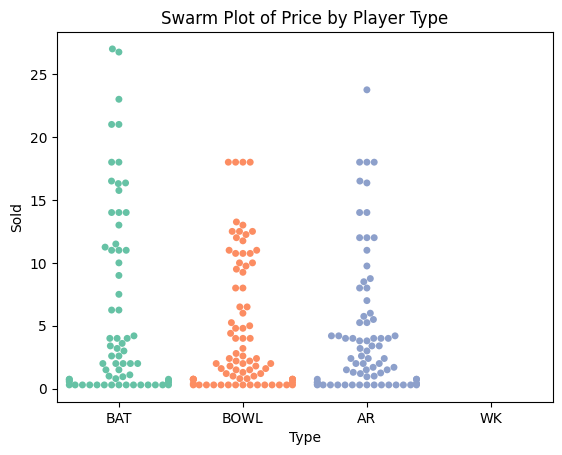

In [ ]:
# Swarm plot for Price by Player Type (adjust 'x' and 'y' for other columns)
sns.swarmplot(data=df, x='Type', y='Sold', palette='Set2')

# Adding title to the plot
plt.title("Swarm Plot of Price by Player Type")

# Show the plot
plt.show()


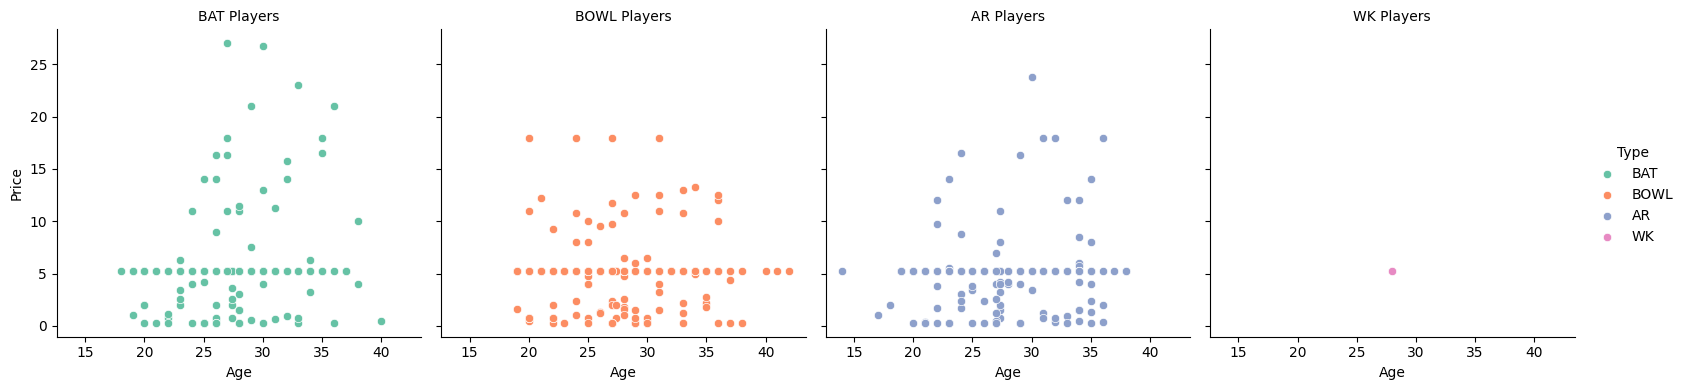

In [ ]:
# Create a FacetGrid for 'Type' and map a scatter plot to it
g = sns.FacetGrid(df, col="Type", hue="Type", col_wrap=4, height=4, palette="Set2")
g.map(sns.scatterplot, "Age", "Sold")  # Use scatterplot (can change to other types like 'lineplot', 'histplot', etc.)

# Add titles and adjust layout
g.set_axis_labels("Age", "Price")
g.set_titles("{col_name} Players")  # Add a title to each subplot
g.add_legend()

# Show the plot
plt.show()


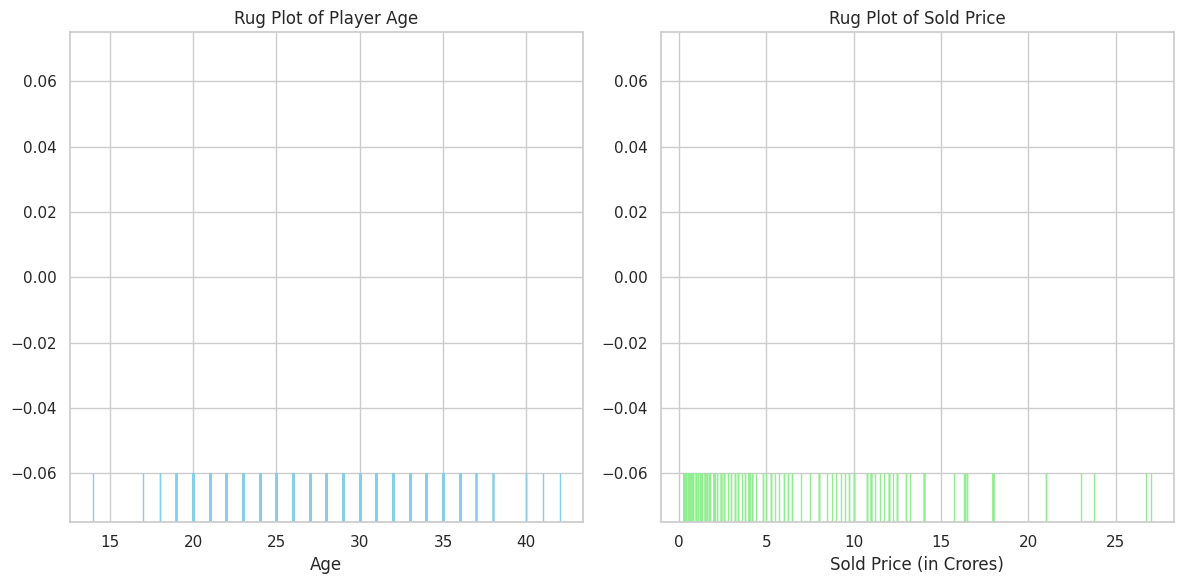

In [34]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two rug plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Rug Plot for Age
sns.rugplot(data=df, x='Age', color='skyblue', height=0.1, ax=axes[0])
axes[0].set_title('Rug Plot of Player Age')
axes[0].set_xlabel('Age')

# Rug Plot for Sold Price
sns.rugplot(data=df, x='Sold', color='lightgreen', height=0.1, ax=axes[1])
axes[1].set_title('Rug Plot of Sold Price')
axes[1].set_xlabel('Sold Price (in Crores)')

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-35-00806f6ff352>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-00806f6ff352>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




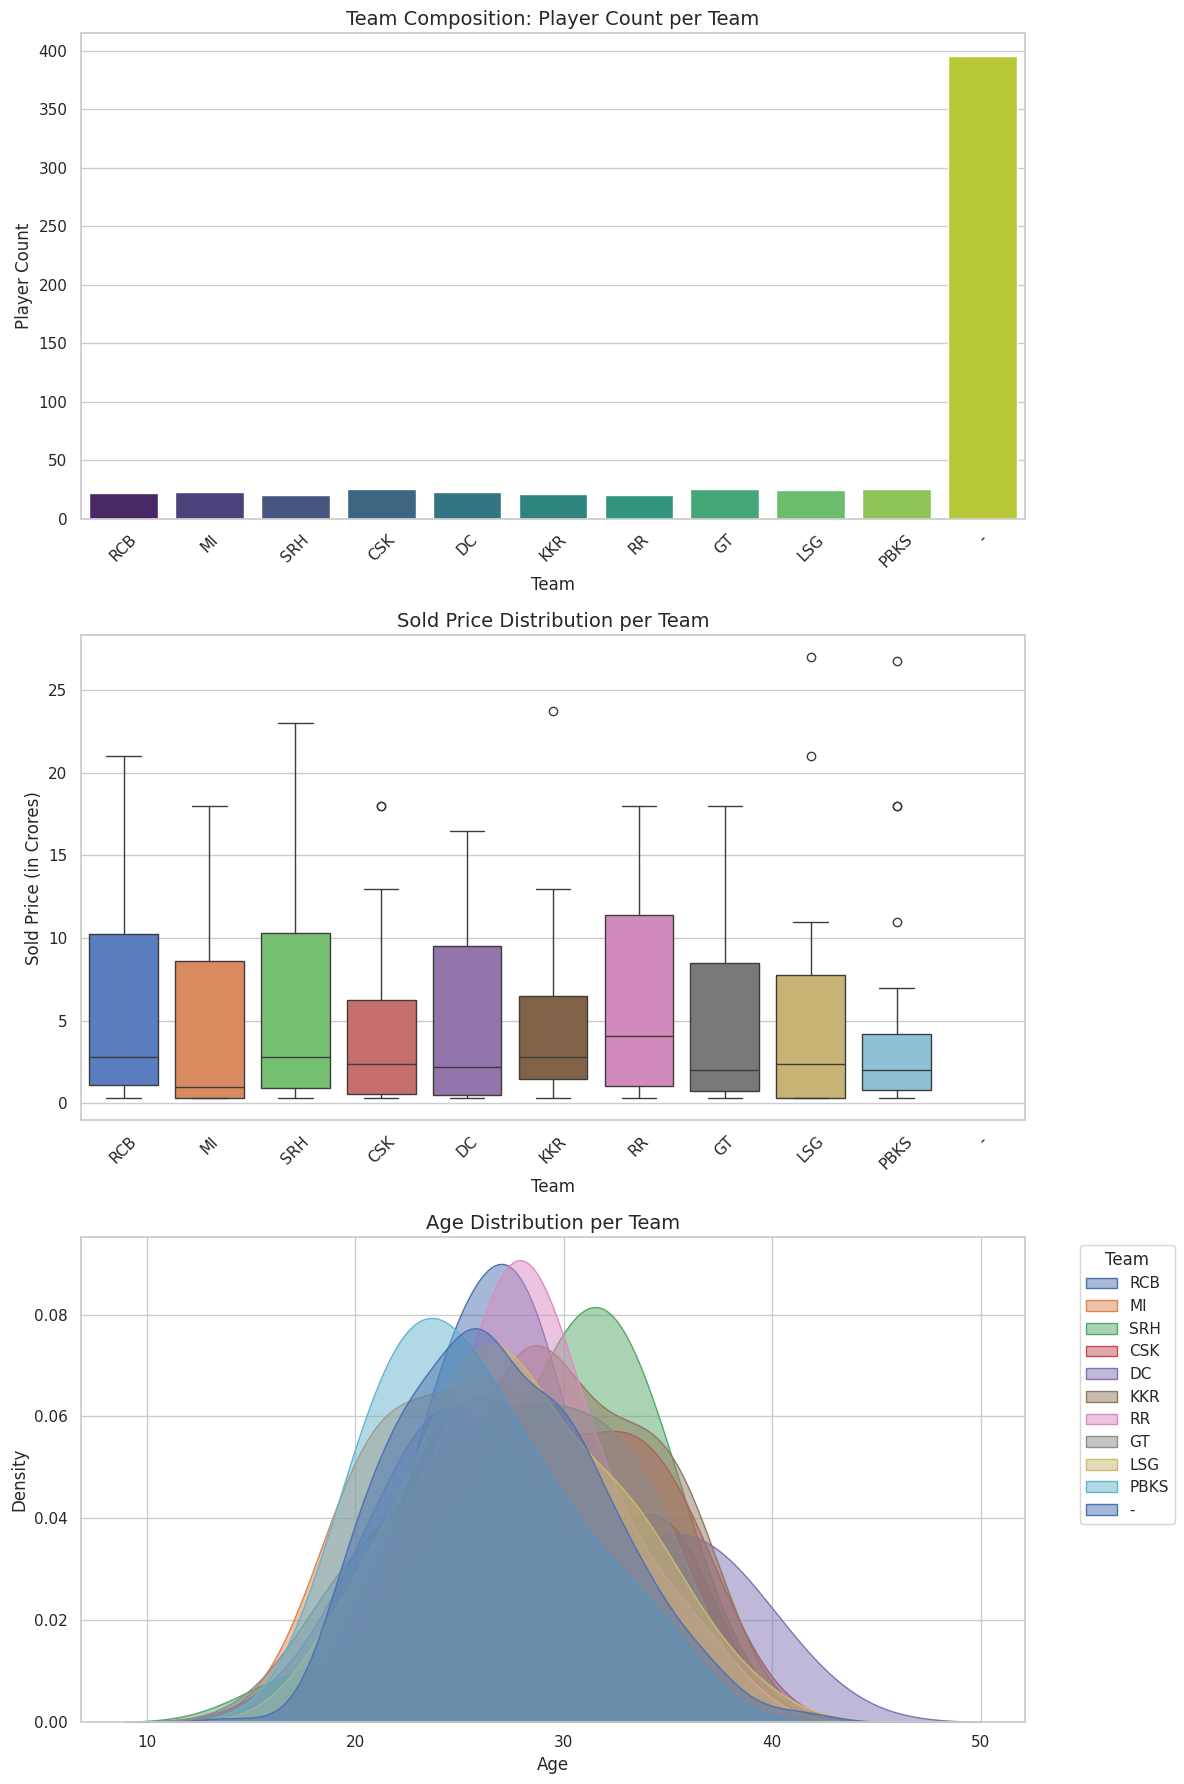

In [35]:
# Convert 'Sold' and 'Age' to numeric
data['Sold'] = pd.to_numeric(data['Sold'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Set up the figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Team Composition: Bar Plot
sns.countplot(data=data, x='Team', palette='viridis', ax=axes[0])
axes[0].set_title('Team Composition: Player Count per Team', fontsize=14)
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Player Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Sold Price Analysis: Box Plot
sns.boxplot(data=data, x='Team', y='Sold', palette='muted', ax=axes[1])
axes[1].set_title('Sold Price Distribution per Team', fontsize=14)
axes[1].set_xlabel('Team', fontsize=12)
axes[1].set_ylabel('Sold Price (in Crores)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Age Distribution: KDE Plot
for team in data['Team'].unique():
    sns.kdeplot(data=data[data['Team'] == team], x='Age', label=team, ax=axes[2], fill=True, alpha=0.5)
axes[2].set_title('Age Distribution per Team', fontsize=14)
axes[2].set_xlabel('Age', fontsize=12)
axes[2].set_ylabel('Density', fontsize=12)
axes[2].legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()



**ADVANCED PLOTS**

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure 'Sold' and 'Age' are numeric
data['Sold'] = pd.to_numeric(data['Sold'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    data,
    x='Sold',          # X-axis: Sold Price
    y='Age',           # Y-axis: Age
    z='Team',          # Z-axis: Team (categorical)
    color='Team',      # Color by Team
    hover_name='Players',  # Show player names on hover
    title='3D Interactive Plot of Sold Prices, Age, and Teams',
)

# Show the plot
fig.update_traces(marker=dict(size=5))  # Adjust marker size if necessary
fig.show()


**CONCLUSION**



This problem statement  provided actionable insights into player
valuation,team bidding strategies, and The analysis of the top 10 sold players in the IPL 2025 auction. The analysis can help teams optimize their strategies for future auctions and provides valuable insights into team composition, player characteristics, and auction dynamics. we identified trends and disparities in team strategies and player selection.

Key findings include:

Team Composition: The count of players per team highlights the varying recruitment strategies employed by franchises.

Sold Price Trends: Box plots and radial charts reveal significant variations in player valuations, with certain teams focusing on high-value marquee players while others diversify their investments.

Age Distribution: Density plots emphasize the preference of teams for younger players, likely prioritizing long-term potential, alongside the inclusion of experienced players to balance the squad.
